<a href="https://colab.research.google.com/github/mathildepapillon/Stat-mech-models/blob/master/Phys240_Hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Problem 1: Modeling of Noisy Data
Suppose you are measuring two quantities (call them $y$ and $x$) related by $y = ax$. This problem will explore how even well-behaved measurement errors can make it difficult to recover $a$.

**a.** First, you will generate some fake data from this model, with $a=0.5$. This type of procedure is known as Monte Carlo, after the casinos, and is often a good place to start when you are trying to understand more complicated real data. Generate 10,000 values $\left\{z_{i}\right\}$ from a uniform distribution from $-1$ to 1 using numpy . random. rand. Pseudo-random numbers are an important research topic, and the subject of Chapter 7 in Numerical Recipes. Now generate your measured values $x_{i}$ and $y_{i}$ by adding independent Gaussian noise to $z_{i}$ and $0.5 z_{i}$, respectively (use numpy.random.randn, and use unit variances). Finally, make a scatter plot of your $x$ and $y$ values, and overplot the correct model $y=0.5 x$ for comparison.

In [4]:
# Pull 10,000 random values from a uniform distribution ranging from -1 to 1
z = np.random.uniform(low=-1, high=1, size=(10000))
#z = np.random.rand(10000) #This funciton generates random numbers between 0 and 1. The question asks for a range between -1 and 1.

In [5]:
# Make Gaussian noise for measurement values
x_noise = np.random.randn(10000)
y_noise = np.random.randn(10000)

# Make x and y
x = z + x_noise
y = 0.5*z + y_noise

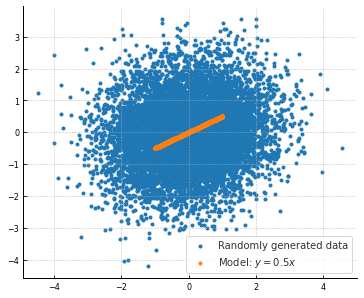

In [6]:
plt.style.use('drive/MyDrive/Phys240/mathilde.mplstyle')
plt.scatter(x, y, label='Randomly generated data')
plt.scatter(z, 0.5*z, label='Model: $y=0.5x$')
plt.legend()
plt.show()


**b.** Now use $\chi^{2}$ to recover the value of $a$ assuming a model $y=a x$. Write down the $\chi^{2}$ expression for this model, taking into account the errors in $y$, but ignoring errors in $x$ for now. Minimize this expression with respect to $a$ and use it on your fake data to calculate the best-fit value of $a$ and its standard deviation. Did you recover $a=0.5 ?$ By how many standard deviations are you off? What is the Gaussian probability of being off by at least this many standard deviations?

Ignoring errors in $x$, $\chi^{2}$ is just 

$\chi^{2}(a, b)=\sum_{i=1}^{N}\left(\dfrac{y_{i}-a x_{i}}{\sigma_{i}}\right)^{2}$ 

Taking the derivative with respect to $a$:

$\dfrac {\partial \chi ^{2}}{\partial a} = \sum_{i=1}^{N} \dfrac {2(y_{i} - a x_{i})(-x_{i})}{\sigma_{i}^{2}}$ 

Rearranging:

$\sum \dfrac {a x_{i}^{2}}{\sigma_{i}^{2}} = \sum \dfrac {y_{i} x_{i}}{\sigma_{i}^{2}} $

$a = \sum_{i=1}^{N} \dfrac {y_{i} x_{i}}{\sigma_{i}^{2}} \bigg(\sum_{j=1}^{N} \dfrac { x_{j}^{2}}{\sigma_{j}^{2}}\bigg)^{-1}$


In [92]:
a_first_sum = np.sum(np.divide(np.dot(y,z),np.dot(y_noise, y_noise)))
a_second_sum = np.sum(np.divide(np.dot(z,z),np.dot(y_noise, y_noise)))
a = a_first_sum/a_second_sum

print('The best fit value for a is {0:.3g}'.format(a))

The best fit value for a is 0.506


What is the standard deviation on this best-fit value of $a$?

The variance of $\sigma_{f}^{2}$ for any function $f$ is 

$\sigma_{f}^{2}=\sum_{i=1}^{N} \sigma_{i}^{2}\left(\dfrac{\partial f}{\partial y_{i}}\right)^{2}$

In the case of the slope,

$\sigma_{a}^{2}=\sum_{i=1}^{N} \sigma_{i}^{2}\left(\dfrac{\partial a}{\partial y_{i}}\right)^{2}$,

where  $\dfrac{\partial a}{\partial y_{i}} = \dfrac{\partial}{\partial y_{i}} \bigg[\sum_{i=1}^{N} \dfrac {y_{i} x_{i}}{\sigma_{i}^{2}} \bigg(\sum_{j=1}^{N} \dfrac { x_{j}^{2}}{\sigma_{j}^{2}}\bigg)^{-1} \bigg ] =  \dfrac {x_{i}}{\sigma_{i}^{2}} \bigg(\sum_{j=1}^{N} \dfrac { x_{j}^{2}}{\sigma_{j}^{2}}\bigg)^{-1}$

Therefore


$\sigma_{a}^{2}=\sum_{i=1}^{N} \sigma_{i}^{2} \bigg(\dfrac {x_{i}}{\sigma_{i}^{2}} \bigg(\sum_{j=1}^{N} \dfrac { x_{j}^{2}}{\sigma_{j}^{2}}\bigg)^{-1}\bigg)^{2} 
= \dfrac{\sum_{i=1}^{N}  \dfrac{x_{i}^{2}}{\sigma_{i}^{2}}}{  \bigg(\sum_{j=1}^{N} \dfrac { x_{j}^{2}}{\sigma_{j}^{2}}\bigg)^{2}}
= \bigg (\sum_{i=1}^{N}  \dfrac{x_{i}^{2}}{\sigma_{i}^{2}} \bigg )^{-1}$



In [91]:
sig_sq_a_inv = np.sum(np.divide(np.dot(x, x), np.dot(y_noise, y_noise)))
sig_sq_a = 1/sig_sq_a_inv
sig_a = np.sqrt(sig_sq_a)
print('Sigma_a is therefore {0:.3g}'.format(sig_a))

Sigma_a is therefore 0.867


Therefore, I did recover a value of $a$. I am within 1 $\sigma_{a}$ away from 0.5

**c.** Numerical Recipes has a discussion on fitting data with errors in two coordinates (Section $15.3$ ). Briefly, you define a new variable $w=y-a x$ with variance $\sigma_{w}^{2}=\sigma_{y}^{2}+a^{2} \sigma_{x}^{2}$. The sum of $n$ independent $w_{i}^{2}$, which your data are, will therefore be $\chi^{2}$ distributed. Write down the new $\chi^{2}$ expression and minimize it with respect to $a$. The algebra is a bit tougher, but with $\sigma_{x}=\sigma_{y}=1$, you can (and should) do everything analytically. What value of $a$ do you recover? Don't worry about computing its standard deviation for now. For an extra challenge, see if you can show that this estimate is consistent, meaning that it gives the right answer for a very large number of data points (assuming you got your errors right!).

In this case, $\chi^{2}$ is

$\begin{equation}
\chi^{2}=\sum_{i=1}^{N} \dfrac{\left(y_{i}-a x_{i}\right)^{2}}{\sigma_{y i}^{2}+a^{2} \sigma_{x i}^{2}}=\sum_{i=1}^{N} \dfrac{\left(y_{i}-a x_{i}\right)^{2}}{\sigma_{wi}^{2}}
\end{equation}$

Taking the derivative with respsect to $a$:

$\dfrac {\partial \chi ^{2}}{\partial a} = \sum_{i=1}^{N}  \dfrac{2(a x_i-y_i)\left(a \sigma_{xi}^{2} y_i+\sigma_{yi}^{2} x_i\right)}{\left(a^{2} \sigma_{xi}^{2}+\sigma_{yi}^{2}\right)^{2}}$

Setting $\dfrac {\partial \chi ^{2}}{\partial a} = 0$, we can solve for $a$ as the roots of the quadratic function on the numerator.


$a^{2} \bigg( \sum_{i} x_{i} y_{i} \sigma_{x_{i}}{ }^{2}\bigg )+a \bigg (\sum_{j} \sigma_{y_{j}}{ }^{2} x_{j}{ }^{2}-\sigma_{x_{j}}{ }^{2} y_{j}^{2} \bigg )-\sum_{k} y_{k} \sigma_{y_{k}}{ }^{2} x_{k}=0$

To facilitate computation, denote this as:

$a^{2} \bigg( A\bigg )+a \bigg (B \bigg )+C=0$

The roots are:

$a = \dfrac{-B \pm \sqrt{B^{2} - 4AC}}{2A} $

We note that there are two possible solutions. We will take the positive one, an intuitive guess. We will epxlore the meaning of the other solution when we plot $\chi^2$.

In [22]:
A_term = np.sum(np.dot(np.dot(x,y), np.dot(x_noise, x_noise)))
B_term = np.sum(np.dot(np.dot(y_noise, y_noise), np.dot(x, x))-np.dot(np.dot(x_noise, x_noise), np.dot(y,y)))
C_term = -np.sum(np.dot(np.dot(y, x), np.dot(y_noise, y_noise)))

In [23]:
a = (-B_term + np.sqrt(B_term**2 -4*A_term*C_term))/(2*A_term)
print('Our recovered value for a is {0:.3g}'.format(a))

Our recovered value for a is 0.5126461535868313


**d.** Now we will explore what happens if we don't get our errors right. Let's
say, for example, that we overestimate our errors in $x$ by $15 \%$ and underestimate our errors in $y$ by $30 \%$. Use the same fake data, but replace $\sigma_{x}$ with $1.15 \sigma_{x}$ and $\sigma_{y}$ with $0.7 \sigma_{y}$ in your $\chi^{2}$ estimator. What value of $a$ do you recover? What value of $\chi^{2}$ per degree of freedom do you obtain? By this measure, is the model a good fit to the data?

We will recompute $a$, re-scaling the $\sigma_x$ and $\sigma_y$ accordingly.

In [27]:
x_noise_bad = 1.15*x_noise
y_noise_bad = 0.7*y_noise

A_term_bad = np.sum(np.dot(np.dot(x,y), np.dot(x_noise_bad, x_noise_bad)))
B_term_bad = np.sum(np.dot(np.dot(y_noise_bad, y_noise_bad), np.dot(x, x))-np.dot(np.dot(x_noise_bad, x_noise_bad), np.dot(y,y)))
C_term_bad = -np.sum(np.dot(np.dot(y, x), np.dot(y_noise_bad, y_noise_bad)))

a_bad = (-B_term_bad + np.sqrt(B_term_bad**2 -4*A_term_bad*C_term_bad))/(2*A_term_bad)
print('Our new recovered value for a is {0:.3g}'.format(a_bad))

Our new recovered value for a is 3.721725944617504


We will now compute the new $\chi^{2} / N$ where $N$ is the number of degrees of freedom (or number of data points, in our case).


$\chi^{2}=\sum_{i=1}^{N} \dfrac{\left(y_{i}-a x_{i}\right)^{2}}{(0.7\sigma_{y i})^{2}+a^{2} (1.15\sigma_{x i})^{2}}$

In [89]:
chi_sq_bad_num = np.square(y-a_bad*x)
chi_sq_bad_den = np.square(0.7*y_noise) + np.square(a_bad*1.15*x_noise)

chi_sq_bad = np.sum(np.divide(chi_sq_bad_num, chi_sq_bad_den))
print('The chi squared in this case is {0:.3g}'.format(chi_sq_bad))

The chi squared in this case is 6.62e+04


We expect the a "good" fit to the data to have $\chi ^{2}$ be within $\pm \sqrt{2N}$ of the amount of degrees of freedom $N$, which in this case is about 140.

Therefore, this is model provides a bad fit to the data.

**e.** Now create a new set of fake data from the same model, $y=0.5 x$. As before, draw $10,000 z_{i}$ from a uniform distribution from $-1$ to 1 , and corresponding $y_{i}$ by adding noise with unit variance to $0.5 z_{i}$. This time, generate your $x_{i}$ by adding noise to your $z_{i}$ with variance proportional to $\left|z_{i}\right|$ (standard deviation proportional to $\sqrt{\left|z_{i}\right|}$ ). Thus, $\sigma_{x}$ will be different for each point. Even worse, you can only estimate its value, since $z_{i}$ (from which the error is derived) is not measurable! Write down $\chi^{2}$ as in part c, first using
$$
\sigma^{2}=\sigma_{y}^{2}+a^{2} \sigma_{x}^{2}\left|x_{i}\right|=1+a^{2}\left|x_{i}\right|
$$
as your variance, and then using
$$
\sigma^{2}=\sigma_{y}^{2}+a^{2} \sigma_{x}^{2}\left|z_{i}\right|=1+a^{2}\left|z_{i}\right|
$$
(the true variance). Note that with real data, you would not be able to carry out the last case. Minimize each $\chi^{2}$ expression with respect to $a$. Because you can't do this analytically, compute $\chi^{2}$ on an appropriately spaced grid of $a$ values and find the values of $a$ that minimize $\chi^{2}$. In more than one dimension, you would have to think more carefully about this minimization problem (Chapter 10 of Numerical Recipes). What best-fit values of $a$ do you recover for each model? You should also compute the standard deviations of $a$ by calculating the range in $a$ over which $\chi^{2}(a) \leq \chi_{\min }^{2}+1$. This range is equal to $2 \sigma_{a}$. By how many standard deviations are you off from the true model in each case?

Generating a new set of fake data:

In [152]:
# Pull 10,000 random values from a uniform distribution ranging from -1 to 1
z_e = np.random.uniform(low=-1, high=1, size=(10000))
#z = np.random.rand(10000) #This funciton generates random numbers between 0 and 1. The question asks for a range between -1 and 1.

# Make Gaussian noise for measurement values
x_noise_e = np.dot(np.sqrt(np.abs(z_e)),np.random.randn(10000))
y_noise_e = np.random.randn(10000)

# Make x and y
x = z + x_noise
y = 0.5*z + y_noise

Writing down the $\chi^2$ using

$$
\sigma^{2}=\sigma_{y}^{2}+a^{2} \sigma_{x}^{2}\left|x_{i}\right|=1+a^{2}\left|x_{i}\right|,
$$

we have

$\chi^{2}=\sum_{i=1}^{N} \dfrac{\left(y_{i}-a x_{i}\right)^{2}}{1+a^{2} \left|x_{i}\right|}$.


Writing down the $\chi^2$ using

$\sigma^{2}=\sigma_{y}^{2}+a^{2} \sigma_{x}^{2}\left|z_{i}\right|=1+a^{2}\left|z_{i}\right|$,

we have

$\chi^{2}=\sum_{i=1}^{N} \dfrac{\left(y_{i}-a x_{i}\right)^{2}}{1+a^{2} \left|z_{i}\right|}$.

We cannot solve for $a$ analytically, so we will compute $\chi^2$ on an array of $a$ values and find the $a$ that minimizes it.

First, we define the functions that will return the two $\chi^2$.

In [153]:
def chi_sq_x(a_from_mesh):
  chi_sq_num = np.square(y-a_from_mesh*x)
  chi_sq_den = (1 + np.square(a_from_mesh)*np.abs(x))
  chi_sq_x_ = np.sum(np.divide(chi_sq_num, chi_sq_den))

  return chi_sq_x_

def chi_sq_z(a_from_mesh):
  chi_sq_num = np.square(y-a_from_mesh*x)
  chi_sq_den = (1 + np.square(a_from_mesh)*np.abs(z))
  chi_sq_z_ = np.sum(np.divide(chi_sq_num, chi_sq_den))

  return chi_sq_z_

Next, we make the array (1-dimensional grid) of $a$ values for which we will compute each $\chi^2$.

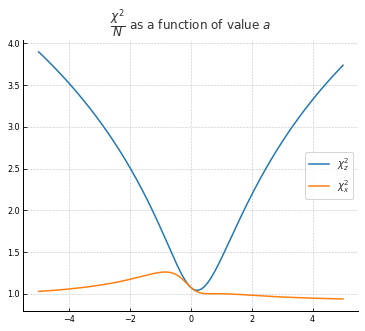

In [154]:
a_array = np.linspace(-5, 5, num = 600)
chi_sq_x_array = [chi_sq_x(a_i)/10000 for a_i in a_array]
chi_sq_z_array = [chi_sq_z(a_i)/10000 for a_i in a_array]

plt.plot(a_array, chi_sq_z_array, label='$\chi_{z}^2$')
plt.plot(a_array, chi_sq_x_array, label='$\chi_{x}^2$')
plt.title('$\dfrac{\chi^2}{N}$ as a function of value $a$')
plt.legend()
plt.show()

Zooming in on the region of interest (where $\chi^2$ approaches 1):

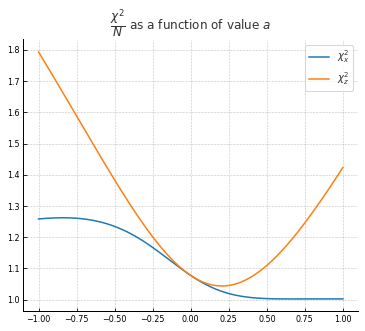

In [155]:
a_array_zoom = np.linspace(-1, 1, num = 300)
chi_sq_x_array_zoom = [chi_sq_x(a_i)/10000 for a_i in a_array_zoom]
chi_sq_z_array_zoom = [chi_sq_z(a_i)/10000 for a_i in a_array_zoom]

plt.plot(a_array_zoom, chi_sq_x_array_zoom, label='$\chi_{x}^2$')
plt.plot(a_array_zoom, chi_sq_z_array_zoom, label='$\chi_{z}^2$')

plt.title('$\dfrac{\chi^2}{N}$ as a function of value $a$')
plt.legend()
plt.show()

What are the best fit values for $a$?

In the case of $\sigma^{2}=\sigma_{y}^{2}+a^{2} \sigma_{x}^{2}\left|x_{i}\right|=1+a^{2}\left|x_{i}\right|$ :

In [156]:
index_min_x = np.argmin(chi_sq_x_array_zoom)
a_x = a_array_zoom[index_min_x]
print('The best value for a in this case is {0:.3g}'.format(a_x))

The best value for a in this case is 0.645


In the case of $\sigma^{2}=\sigma_{y}^{2}+a^{2} \sigma_{x}^{2}\left|z_{i}\right|=1+a^{2}\left|z_{i}\right|$ :



In [157]:
index_min_z = np.argmin(chi_sq_z_array_zoom)
a_z = a_array_zoom[index_min_z]
print('The best value for a in this case is {0:.3g}'.format(a_z))

The best value for a in this case is 0.204


What are the standard deviations on these numbers? We want to find the range in $a$ over which $\chi^{2}(a) \leq \chi_{\min }^{2}+1$.

In the case of $\sigma^{2}=\sigma_{y}^{2}+a^{2} \sigma_{x}^{2}\left|x_{i}\right|=1+a^{2}\left|x_{i}\right|$ :

In [158]:
chi_min_x = chi_sq_x_array_zoom[index_min_x] #get minimum chi square
chi_min_x_plus = chi_min_x+1 #get min chi square + 1

idx_min_x_plus = np.argmin(np.abs(chi_sq_x_array_zoom - chi_min_x_plus)) #at what index does our computed chi sq get closest to chi+1
a_to_hit_one = (a_array_zoom[idx_min_x_plus]) #get a corresponding to this index
a_range = np.abs(a_to_hit_one - a_x) #get range in a

print('Therefore the a-range in which chi squared remains below a difference of 1 with its minimum is given by {0:.3g}'.format(a_range))

Therefore the a-range in which chi squared remains below a difference of 1 with its minimum is given by 1.48


To get the standard deviation on $a$, we use the fact that range over which $\chi^{2}(a) \leq \chi_{\min }^{2}+1$ is equal to $2 \sigma_{a}$. 

In [159]:
sig_a_x = a_range / 2
print('The standard deviation on a, in this case, is {0:.3g}'.format(sig_a_x))

The standard deviation on a, in this case, is 0.742


In [160]:
chi_min_z = chi_sq_z_array_zoom[index_min_z] #get minimum chi square
chi_min_z_plus = chi_min_z+1 #get min chi square + 1

idx_min_z_plus = np.argmin(np.abs(chi_sq_z_array_zoom - chi_min_z_plus)) #at what index does our computed chi sq get closest to chi+1
a_to_hit_one_z = (a_array_zoom[idx_min_z_plus]) #get a corresponding to this index
a_range_z = np.abs(a_to_hit_one_z - a_z) #get range in a

print('Therefore the a-range in which chi squared remains below a difference of 1 with its minimum is given by {0:.3g}'.format(a_range_z))


Therefore the a-range in which chi squared remains below a difference of 1 with its minimum is given by 1.2


Again dividing by 2 to obtain $\sigma_a$:

In [161]:
sig_a_z = a_range_z / 2
print('The standard deviation on a, in this case, is {0:.3g}'.format(sig_a_z))

The standard deviation on a, in this case, is 0.602


By how many standard deviaitons is each model off?

In [164]:
dev_x = np.abs(a_x - 0.5)/sig_a_x
dev_z = np.abs(a_z - 0.5)/sig_a_z

print('The models are off by {0:.1g} and {0:.1g} standard deviations in a, respectively.'.format(dev_x, dev_z))

The models are off by 0.2 and 0.2 standard deviations in a, respectively.


# Problem 2: Supernova Neutrinos

Most of the energy in a supernova explosion is released in the form of neutrinos. Supernova 1987A, which exploded in the Large Magellanic Cloud, was the nearest supernova to the Earth in modern times, and the Kamiokande II detector in Japan observed 12 neutrinos from this explosion. We will model the neutrino event rate, $R(t)$, at Kamiokande as a function of three terms: $t_{\mathrm{SN}}$, the time when the supernova went off, $\tau$, the exponential decay time of the neutrino signal and $F_{0}$, the product of the fluence and the "effective" cross-section of the detector:
$$
R(t)=\frac{F_{0}}{\tau} \exp \left[-\frac{t-t_{\mathrm{SN}}}{\tau}\right] \Theta\left(t-t_{\mathrm{SN}}\right)
$$
where $\Theta(x)$ is the Heaviside function: $\Theta(x)=0$ for $x<0$ and $\Theta(x)=1$ for $x \geq 0$. The Heaviside function encodes the information that the event rate is 0 before the explosion.
We detect $N$ events from the supernova that arrive at time $t_{1}, t_{2}, \ldots, t_{N}$, where $t_{1}<t_{2}<\ldots<t_{N}$.

a. Write down the log of the likelihood function, the probability of the data given the model (parametrized by $F_{0}, \tau$, and $t_{\mathrm{SN}})$, binning the data in bins of width $\Delta t$. 